In [1]:
import math
import numpy as np
from itertools import product
import random

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
def sample_colors_from_span(splits):
    span_lenght = 256
    pixel_values = np.arange(span_lenght)
    idx = np.round(np.linspace(0, len(pixel_values) - 1, splits)).astype(int)
    sampled_values = pixel_values[idx].tolist()
    return np.array(list(product(sampled_values, repeat=3)))

In [7]:
WRITE_RESULTS = True
dataset_id_letter = 'e4'
splits = 4
n_b_split_colors = 56 # 8 originally
held_out_colors = 8 # 8 originally

colors = sample_colors_from_span(splits=splits)

In [8]:
print(f'Total number of colors: {splits**3}')
print(f'Total systematic colors: {n_b_split_colors + held_out_colors}')
print(f'Total common colors: {splits**3 - n_b_split_colors - held_out_colors}')

Total number of colors: 64
Total systematic colors: 64
Total common colors: 0


In [9]:
systematic_colors = sample_colors_from_span(splits=2)

In [10]:
all([(a == colors).all(-1).any() for a in systematic_colors])

True

In [11]:
def display_colors(color_array, patches_per_row=10, patch_size=1):
    """
    Display a list of colors using matplotlib in multiple rows and larger patches.
    
    Parameters:
    color_array (numpy.ndarray): A 2D NumPy array with shape (n, 3), where each row represents an RGB color.
    patches_per_row (int): The number of color patches per row.
    patch_size (int or float): The size of each color patch.
    """
    num_colors = color_array.shape[0]
    num_rows = math.ceil(num_colors / patches_per_row)
    
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(patches_per_row * patch_size, num_rows * patch_size))
    
    # Create a patch for each color
    for idx, color in enumerate(color_array):
        # Normalize the RGB values to the range [0, 1]
        normalized_color = color / 255.0
        row = idx // patches_per_row
        col = idx % patches_per_row
        ax.add_patch(
            plt.Rectangle(
                (col * patch_size, row * patch_size), patch_size, patch_size, color=normalized_color))
    
    # Set the limits and hide the axes
    ax.set_xlim(0, patches_per_row * patch_size)
    ax.set_ylim(0, num_rows * patch_size)
    ax.invert_yaxis()
    ax.axis('off')
    
    plt.show()

In [12]:
colors.shape

(64, 3)

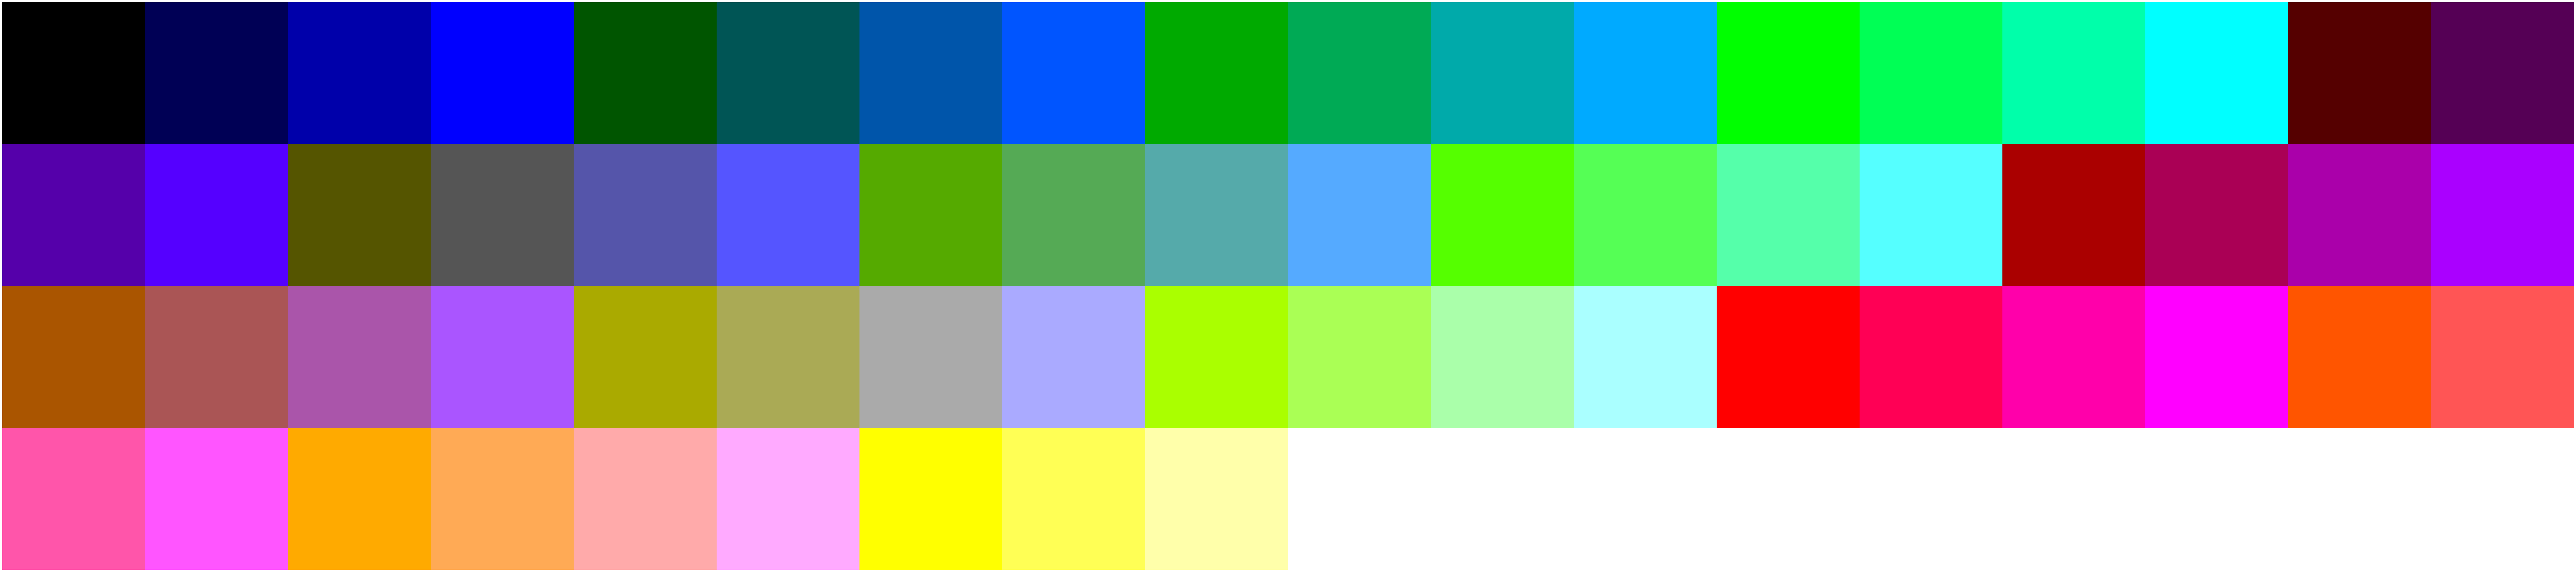

In [13]:
display_colors(colors, patches_per_row=18, patch_size=8)

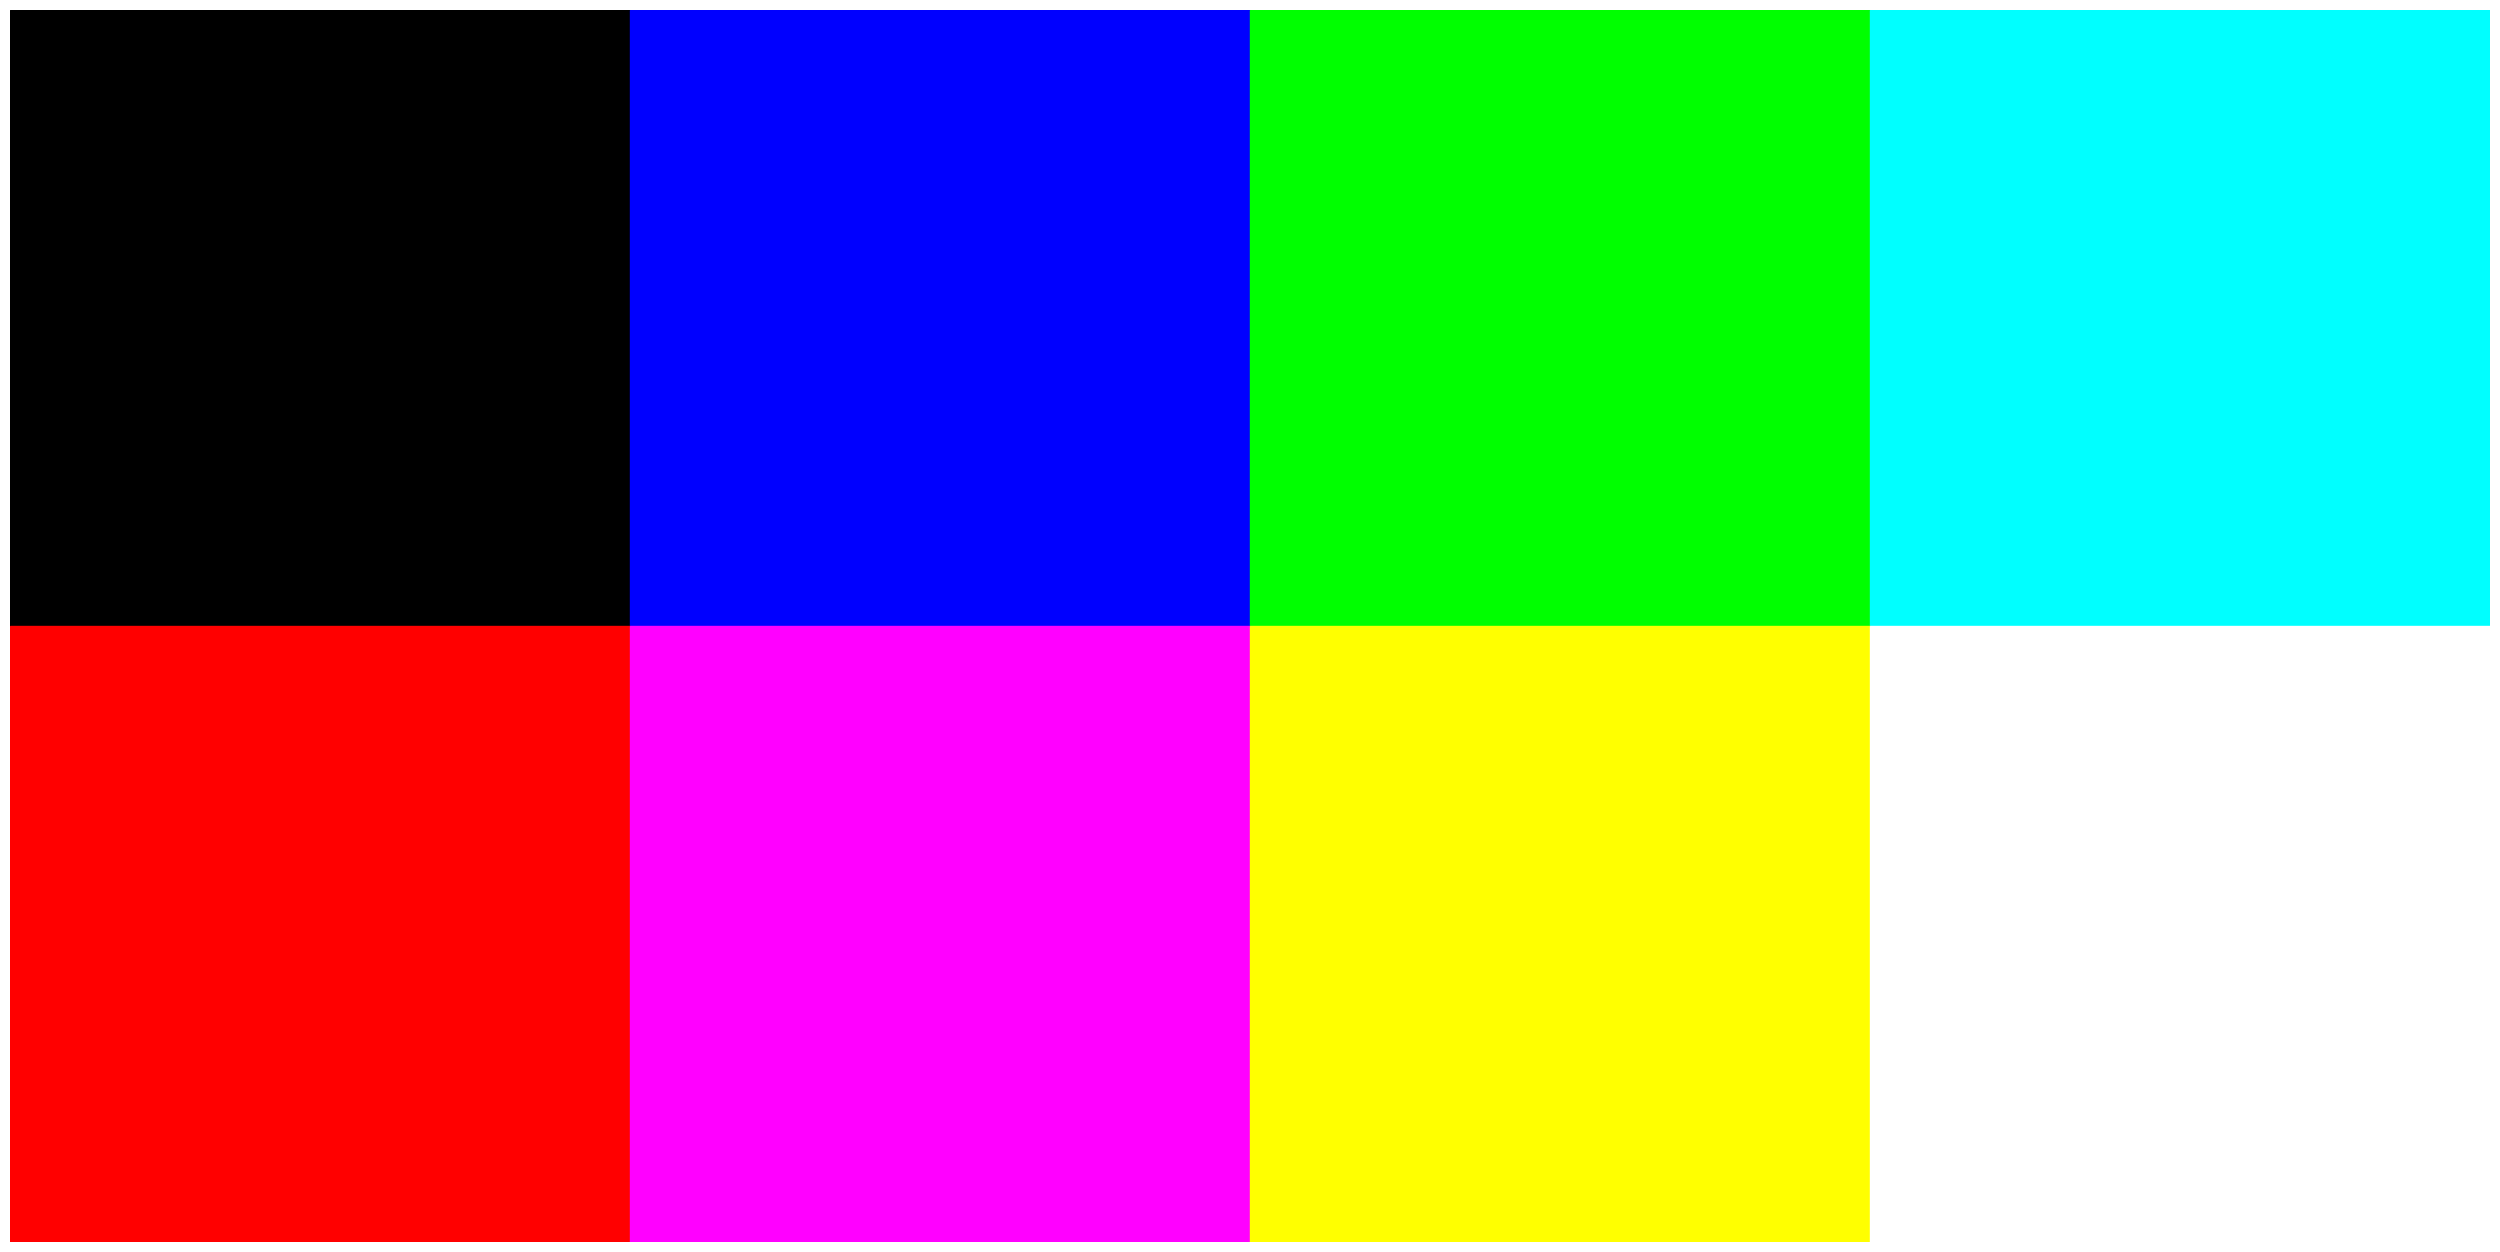

In [14]:
display_colors(systematic_colors, patches_per_row=4, patch_size=8)

In [15]:
def rgb_to_hex(color):
    return '#{:02x}{:02x}{:02x}'.format(*color)

In [16]:
[rgb_to_hex(c) for c in colors]

['#000000',
 '#000055',
 '#0000aa',
 '#0000ff',
 '#005500',
 '#005555',
 '#0055aa',
 '#0055ff',
 '#00aa00',
 '#00aa55',
 '#00aaaa',
 '#00aaff',
 '#00ff00',
 '#00ff55',
 '#00ffaa',
 '#00ffff',
 '#550000',
 '#550055',
 '#5500aa',
 '#5500ff',
 '#555500',
 '#555555',
 '#5555aa',
 '#5555ff',
 '#55aa00',
 '#55aa55',
 '#55aaaa',
 '#55aaff',
 '#55ff00',
 '#55ff55',
 '#55ffaa',
 '#55ffff',
 '#aa0000',
 '#aa0055',
 '#aa00aa',
 '#aa00ff',
 '#aa5500',
 '#aa5555',
 '#aa55aa',
 '#aa55ff',
 '#aaaa00',
 '#aaaa55',
 '#aaaaaa',
 '#aaaaff',
 '#aaff00',
 '#aaff55',
 '#aaffaa',
 '#aaffff',
 '#ff0000',
 '#ff0055',
 '#ff00aa',
 '#ff00ff',
 '#ff5500',
 '#ff5555',
 '#ff55aa',
 '#ff55ff',
 '#ffaa00',
 '#ffaa55',
 '#ffaaaa',
 '#ffaaff',
 '#ffff00',
 '#ffff55',
 '#ffffaa',
 '#ffffff']

In [17]:
named_colors = {rgb_to_hex(c): c for c in colors.tolist()}
named_systematic_colors = {rgb_to_hex(c): c for c in systematic_colors.tolist()}

In [18]:
properties = {
  "shapes": {
    "cube": "SmoothCube_v2",
    "sphere": "Sphere",
    "cylinder": "SmoothCylinder"
  },
  "colors": named_colors,
  "materials": {
    "rubber": "Rubber",
    "metal": "MyMetal"
  },
  "sizes": {
    "large": 0.7,
    "small": 0.35
  }
}

In [19]:
actual_num_colors = len(named_colors)
assert splits**3 == actual_num_colors

actual_num_colors

64

In [20]:
import json
base_dir = '/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/image_generation/data/multicolored-v2/'

if WRITE_RESULTS:
    print('Writing properties')
    with open(base_dir + f'properties-{actual_num_colors}{dataset_id_letter}.json', 'w') as fp:
        json.dump(properties, fp, indent=2)

print(base_dir + f'properties-{actual_num_colors}{dataset_id_letter}.json')

Writing properties
/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/image_generation/data/multicolored-v2/properties-64e4.json


In [21]:
all_color_names = list(named_colors.keys())
systematic_color_names = list(named_systematic_colors.keys())

In [22]:
sr = n_b_split_colors // 2
s = len(systematic_color_names) // 2

if actual_num_colors != 8:
    candidate_colors = list(set(all_color_names) - set(systematic_color_names))
    rand_systematic_color_names = random.sample(candidate_colors, k=n_b_split_colors)
else:
    rand_systematic_color_names = random.sample(systematic_color_names, k=n_b_split_colors)

In [23]:
random.shuffle(rand_systematic_color_names)
# random.shuffle(systematic_color_names)
systematic_color_names = ['#000000', '#0000ff', '#00ff00', '#ff0000', '#00ffff', '#ff00ff', '#ffff00', '#ffffff']

In [24]:
b_cube_colors = rand_systematic_color_names[:sr]
b_cylinder_colors = rand_systematic_color_names[sr:]
if len(all_color_names) == 8:
    c_cube_colors = b_cube_colors
    c_cylinder_colors = b_cylinder_colors
else:
    c_cube_colors = systematic_color_names[:s]
    c_cylinder_colors = systematic_color_names[s:]

train_cube_colors = list(set(all_color_names) - set(b_cube_colors) - set(c_cube_colors))
train_cylinder_colors = list(set(all_color_names) - set(b_cylinder_colors) - set(c_cylinder_colors))

new_cogen_a = {
    "cube": train_cube_colors,
    "cylinder": train_cylinder_colors,
    "sphere": all_color_names,
}
new_cogen_b = {
    "cube": b_cube_colors,
    "cylinder": b_cylinder_colors,
    "sphere": all_color_names,
}
new_cogen_c = {
    "cube": c_cube_colors,
    "cylinder": c_cylinder_colors,
    "sphere": all_color_names,
}

In [25]:
assert not set(new_cogen_b["cube"]).issubset(set(new_cogen_a["cube"]))
assert not set(new_cogen_c["cube"]).issubset(set(new_cogen_a["cube"]))
assert (
    set(new_cogen_c["cube"]) | 
    set(new_cogen_b["cube"]) | 
    set(new_cogen_a["cube"]) 
    == set(new_cogen_a["sphere"])
)

assert not set(new_cogen_b["cylinder"]).issubset(set(new_cogen_a["cylinder"]))
assert not set(new_cogen_c["cylinder"]).issubset(set(new_cogen_a["cylinder"]))
assert (
    set(new_cogen_c["cylinder"]) | 
    set(new_cogen_b["cylinder"]) | 
    set(new_cogen_a["cylinder"]) 
    == set(new_cogen_a["sphere"])
)

assert set(new_cogen_b["sphere"]) == set(new_cogen_a["sphere"])
assert set(new_cogen_c["sphere"]) == set(new_cogen_a["sphere"])

In [26]:
print(len(new_cogen_a['cube']), len(new_cogen_b['cube']), len(new_cogen_c['cube']))
print(len(new_cogen_a['cylinder']), len(new_cogen_b['cylinder']), len(new_cogen_c['cylinder']))
print(len(new_cogen_a['sphere']), len(new_cogen_b['sphere']), len(new_cogen_c['sphere']))

32 28 4
32 28 4
64 64 64


In [27]:
if WRITE_RESULTS:
    print('Writing splits')
    with open(f'{base_dir}/CoGenT_A-{actual_num_colors}{dataset_id_letter}.json', 'w') as fp:
        json.dump(new_cogen_a, fp, indent=2)

    with open(f'{base_dir}/CoGenT_B-{actual_num_colors}{dataset_id_letter}.json', 'w') as fp:
        json.dump(new_cogen_b, fp, indent=2)

#     if actual_num_colors == 8:
    with open(f'{base_dir}/CoGenT_C-{actual_num_colors}{dataset_id_letter}.json', 'w') as fp:
        json.dump(new_cogen_c, fp, indent=2)
        
print(f'{base_dir}/CoGenT_A-{actual_num_colors}{dataset_id_letter}.json')
print(f'{base_dir}/CoGenT_B-{actual_num_colors}{dataset_id_letter}.json')
print(f'{base_dir}/CoGenT_C-{actual_num_colors}{dataset_id_letter}.json')

Writing splits
/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/image_generation/data/multicolored-v2//CoGenT_A-64e4.json
/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/image_generation/data/multicolored-v2//CoGenT_B-64e4.json
/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/image_generation/data/multicolored-v2//CoGenT_C-64e4.json


In [28]:
all_colors = set(new_cogen_a['sphere'])
common_colors = set(new_cogen_a['cube']) & set(new_cogen_a['cylinder'])
exclusive_colors = set(new_cogen_a['cube']) - set(new_cogen_a['cylinder'])
print('all_colors:      ', len(all_colors))
print('common_colors:   ', len(common_colors))
print('exclusive_colors:', len(exclusive_colors))

all_colors:       64
common_colors:    0
exclusive_colors: 32


In [29]:
new_cogen_a

{'cube': ['#aa5500',
  '#ffaaaa',
  '#aaaaaa',
  '#ffff00',
  '#aaaa00',
  '#00aaff',
  '#00ffaa',
  '#aa55aa',
  '#ffffff',
  '#00aa00',
  '#00aaaa',
  '#0055aa',
  '#55ff00',
  '#550000',
  '#005555',
  '#00ff55',
  '#aaaaff',
  '#ff00ff',
  '#0055ff',
  '#555555',
  '#ffaaff',
  '#00ffff',
  '#5500ff',
  '#55aa55',
  '#0000aa',
  '#5555ff',
  '#55aa00',
  '#55ff55',
  '#550055',
  '#5500aa',
  '#55aaaa',
  '#ff0055'],
 'cylinder': ['#aa0055',
  '#55ffff',
  '#5555aa',
  '#aaaa55',
  '#aa5555',
  '#aaffaa',
  '#ffffaa',
  '#00aa55',
  '#005500',
  '#ffaa55',
  '#ff55aa',
  '#555500',
  '#55aaff',
  '#55ffaa',
  '#00ff00',
  '#aa00ff',
  '#000055',
  '#aaffff',
  '#ffaa00',
  '#ff5555',
  '#aa0000',
  '#aa00aa',
  '#ff00aa',
  '#aa55ff',
  '#aaff00',
  '#ff0000',
  '#000000',
  '#aaff55',
  '#0000ff',
  '#ff55ff',
  '#ffff55',
  '#ff5500'],
 'sphere': ['#000000',
  '#000055',
  '#0000aa',
  '#0000ff',
  '#005500',
  '#005555',
  '#0055aa',
  '#0055ff',
  '#00aa00',
  '#00aa55',
  '#00

In [5]:
base_dir = '/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/image_generation'
split = '8c'
for i in range(1,6):
    !cp {base_dir}/data/multicolored-v2/CoGenT_A-{split}.json {base_dir}/data/multicolored-v2/CoGenT_A-{split}_{i}.json
    !cp {base_dir}/data/multicolored-v2/CoGenT_B-{split}.json {base_dir}/data/multicolored-v2/CoGenT_B-{split}_{i}.json
    !cp {base_dir}/data/multicolored-v2/CoGenT_C-{split}.json {base_dir}/data/multicolored-v2/CoGenT_C-{split}_{i}.json
    !cp {base_dir}/data/multicolored-v2/properties-{split}.json {base_dir}/data/multicolored-v2/properties-{split}_{i}.json